<a href="https://colab.research.google.com/github/zayo1511/MetodosOptimizacionIFI/blob/main/HW_9_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diego Lozoya Morales | 745345

Raúl Oviedo Magaña | 744442

José Armando Melchor Soto | 745697

Rolando Fortanell Canedo | 744872

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxpy as cp
from sklearn.linear_model import LinearRegression

#Problem 1
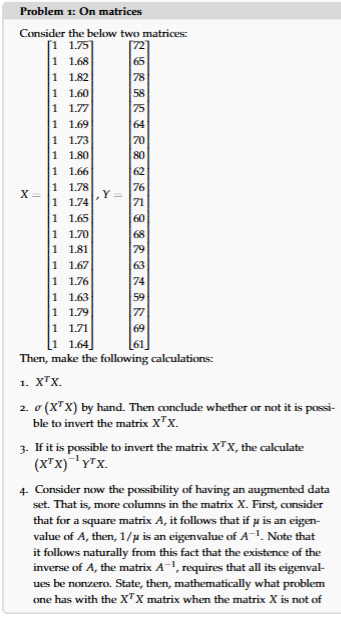

In [2]:
X = np.array([
    [1, 1.75],
    [1, 1.68],
    [1, 1.82],
    [1, 1.60],
    [1, 1.77],
    [1, 1.69],
    [1, 1.73],
    [1, 1.80],
    [1, 1.66],
    [1, 1.78],
    [1, 1.74],
    [1, 1.65],
    [1, 1.70],
    [1, 1.68],
    [1, 1.67],
    [1, 1.76],
    [1, 1.63],
    [1, 1.79],
    [1, 1.71],
    [1, 1.64]
])

Y = np.array([
    [72],
    [65],
    [78],
    [58],
    [75],
    [64],
    [70],
    [80],
    [62],
    [76],
    [71],
    [60],
    [68],
    [79],
    [63],
    [74],
    [59],
    [77],
    [69],
    [61]
])

In [3]:
X_T= X.T
XtX= X.T @ X

In [4]:
det_XT_X= np.linalg.det(XtX)
if np.isclose(det_XT_X, 0):
    print("La matriz X^T X no es invertible.")
else:
    print("La matriz X^T X es invertible.")

La matriz X^T X es invertible.


In [5]:
XtX_inv = np.linalg.inv(XtX)
Y_T= Y.T
Y_TX= Y_T@X

In [6]:
resultado= XtX_inv@Y_TX.T

In [7]:
print('1:' ,XtX)
print('2: Es invertible ')
print('3: ',resultado)

1: [[20.     34.25  ]
 [34.25   58.7269]]
2: Es invertible 
3:  [[-106.14611996]
 [ 102.30430363]]


4. Cuando se tienen más columnas , puede llegar a ser que no se puede calcular la inversa de las matrices , cuando X no tiene rango completo , significa que $X^T X$ es con det = 0 , y por lo tanto no tiene inversa. Con esto si X tiene columnas LI , entonces la matrix $ X^T X$ no es invertible

# Problem 2

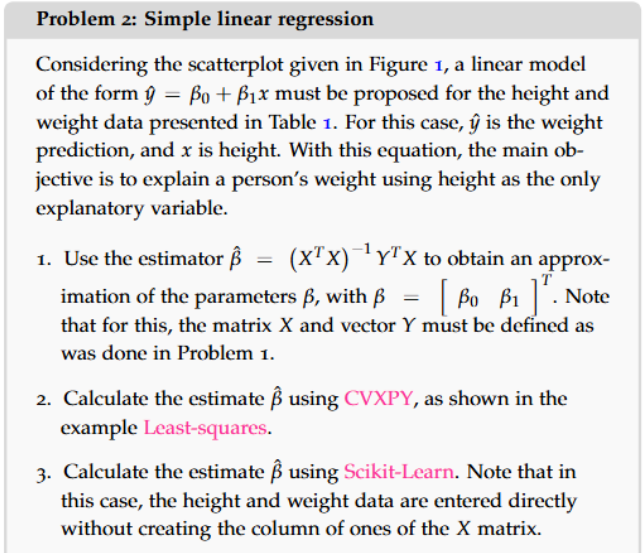

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the data arrays for height and weight
height = np.array([1.75, 1.68, 1.82, 1.60, 1.77, 1.69, 1.73, 1.80, 1.66, 1.78,
                   1.74, 1.65, 1.70, 1.81, 1.67, 1.76, 1.63, 1.79, 1.71, 1.64]).reshape(-1, 1)
weight = np.array([72, 65, 78, 58, 75, 64, 70, 80, 62, 76,
                   71, 60, 68, 79, 63, 74, 59, 77, 69, 61])

# Create and fit the linear regression model
model = LinearRegression()
model.fit(height, weight)

# Retrieve the coefficients
beta_0 = model.intercept_  # Intercept
beta_1 = model.coef_[0]    # Slope

# Display the linear model equation
print(f"The linear model is: ŷ = {beta_0:.2f} + {beta_1:.2f} * x")


The linear model is: ŷ = -117.70 + 108.64 * x


In [9]:


# Define matrix X with a column of ones and the height data as the second column
X = np.array([
    [1, 1.75], [1, 1.68], [1, 1.82], [1, 1.60], [1, 1.77],
    [1, 1.69], [1, 1.73], [1, 1.80], [1, 1.66], [1, 1.78],
    [1, 1.74], [1, 1.65], [1, 1.70], [1, 1.81], [1, 1.67],
    [1, 1.76], [1, 1.63], [1, 1.79], [1, 1.71], [1, 1.64]
])

# Define vector Y (weights)
Y = np.array([72, 65, 78, 58, 75, 64, 70, 80, 62, 76, 71, 60, 68, 79, 63, 74, 59, 77, 69, 61])

# Calculate beta using the formula (X^T X)^(-1) X^T Y
XtX_inv = np.linalg.inv(X.T @ X)  # (X^T X)^(-1)
XtY = X.T @ Y                     # X^T Y
beta = XtX_inv @ XtY              # beta = (X^T X)^(-1) X^T Y

# Display the estimated beta values
beta_0, beta_1 = beta
print(f"The estimated parameters are β0 = {beta_0:.2f} and β1 = {beta_1:.2f}")


The estimated parameters are β0 = -117.70 and β1 = 108.64


In [10]:
# Define matrix X with a column of ones and the height data as the second column
X = np.array([
    [1, 1.75], [1, 1.68], [1, 1.82], [1, 1.60], [1, 1.77],
    [1, 1.69], [1, 1.73], [1, 1.80], [1, 1.66], [1, 1.78],
    [1, 1.74], [1, 1.65], [1, 1.70], [1, 1.81], [1, 1.67],
    [1, 1.76], [1, 1.63], [1, 1.79], [1, 1.71], [1, 1.64]
])

# Define vector Y (weights)
Y = np.array([72, 65, 78, 58, 75, 64, 70, 80, 62, 76, 71, 60, 68, 79, 63, 74, 59, 77, 69, 61])

# Define the beta variable for the linear regression parameters (intercept and slope)
beta = cp.Variable(2)

# Define the objective function for least-squares
objective = cp.Minimize(cp.sum_squares(X @ beta - Y))

# Define and solve the problem
problem = cp.Problem(objective)
problem.solve()

# Get the estimated beta values
beta_0 = beta.value[0]  # Intercept
beta_1 = beta.value[1]  # Slope

print(f"The estimated parameters are β0 = {beta_0:.2f} and β1 = {beta_1:.2f}")


The estimated parameters are β0 = -117.70 and β1 = 108.64


In [11]:


# Define the data arrays for height and weight
height = np.array([1.75, 1.68, 1.82, 1.60, 1.77, 1.69, 1.73, 1.80, 1.66, 1.78,
                   1.74, 1.65, 1.70, 1.81, 1.67, 1.76, 1.63, 1.79, 1.71, 1.64]).reshape(-1, 1)
weight = np.array([72, 65, 78, 58, 75, 64, 70, 80, 62, 76, 71, 60, 68, 79, 63, 74, 59, 77, 69, 61])

# Create and fit the linear regression model with an intercept
model = LinearRegression(fit_intercept=True)
model.fit(height, weight)

# Retrieve the estimated coefficients
beta_0 = model.intercept_  # Intercept
beta_1 = model.coef_[0]    # Slope

# Display the estimated beta values
print(f"The estimated parameters are β0 = {beta_0:.2f} and β1 = {beta_1:.2f}")


The estimated parameters are β0 = -117.70 and β1 = 108.64


# Problem 3
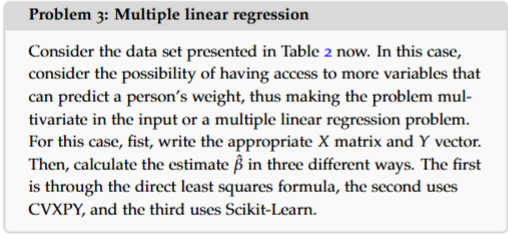

In [12]:
y=[72, 65, 78, 58, 75, 64, 70, 80, 62, 76, 71, 60, 68, 79, 63, 74, 59, 77, 69, 61]
# Valores iniciales para la columna de estaturas (puedes cambiarlo a cualquier conjunto de valores)
valores = np.array([1.75, 1.68, 1.82, 1.60, 1.77,
                    1.69, 1.73, 1.80, 1.66, 1.78,
                    1.74, 1.65, 1.70, 1.81, 1.67,
                    1.76, 1.63, 1.79, 1.71, 1.64])
# Valores iniciales para la columna de PAL
valores2 = np.array([1.6, 1.5, 1.8, 1.4, 1.7,
                     1.6, 1.5, 1.9, 1.5, 1.7,
                     1.6, 1.4, 1.5, 1.8, 1.5,
                     1.7, 1.4, 1.8, 1.6, 1.4])
# Valores iniciales para la columna de BMR
valores3 = np.array([1650, 1500, 1800, 1400, 1700,
                     1550, 1600, 1850, 1450, 1750,
                     1650, 1450, 1550, 1800, 1500,
                     1700, 1400, 1750, 1600, 1450])

# Crear el DataFrame inicial
df = pd.DataFrame({'Beta 0': 1, 'Estatura': valores, 'PAL': valores2, 'BMR': valores3})

X = df.values

# Mostrar el DataFrame resultante
df.head()

,Beta 0,Estatura,PAL,BMR
0,1,1.75,1.6,1650
1,1,1.68,1.5,1500
2,1,1.82,1.8,1800
3,1,1.60,1.4,1400
4,1,1.77,1.7,1700


##Direct least squares formula

In [13]:
xtx=np.dot(df.T, df)
xty=np.dot(df.T, y)
XTX_inv=np.linalg.inv(xtx)
betas=np.dot(XTX_inv, xty)

for i in range(len(betas)):
    print("Beta " + str(i) + ": " + str(betas[i]))

Beta 0: -57.24022393900668
Beta 1: 46.00789572211215
Beta 2: -3.9696423101704568
Beta 3: 0.03335466085837879


##CVXPY

In [14]:
# Definir las variables de los coeficientes y el intercepto
beta = cp.Variable(X.shape[1])
beta_0 = cp.Variable()

# Función de costo (mínimos cuadrados)
error = y - (X @ beta + beta_0)
objective = cp.Minimize(cp.sum_squares(error))

# Resolver el problema de optimización
prob = cp.Problem(objective)
prob.solve()

# Resultados
coef_cvxpy = beta.value
intercept_cvxpy = beta_0.value

for i in range(len(coef_cvxpy)):
    print("Beta " + str(i) + ": " + str(coef_cvxpy[i]))

Beta 0: -28.620111861869365
Beta 1: 46.00789572225325
Beta 2: -3.969642310204383
Beta 3: 0.033354660858248474


##Scikit-Learn

In [15]:
# Crear el modelo y ajustarlo
reg = LinearRegression().fit(X, y)
coef_scikit = reg.coef_
intercept_scikit = reg.intercept_

# Resultados
print("Beta 0: " + str(intercept_scikit))
for i in range(1, len(coef_scikit)):
    print("Beta " + str(i) + ": " + str(coef_scikit[i]))

Beta 0: -57.24022393902548
Beta 1: 46.0078957220272
Beta 2: -3.9696423101784366
Beta 3: 0.033354660858314844


# Problem 4
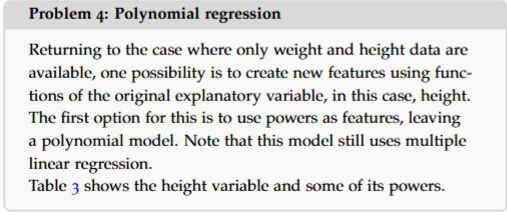

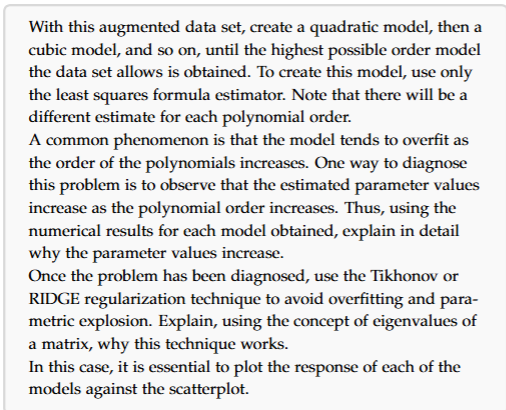

In [16]:
y=[72, 65, 78, 58, 75, 64, 70, 80, 62, 76, 71, 60, 68, 79, 63, 74, 59, 77, 69, 61]
# Valores iniciales para la columna de estaturas (puedes cambiarlo a cualquier conjunto de valores)
valores = np.array([1.75, 1.68, 1.82, 1.60, 1.77,
                    1.69, 1.73, 1.80, 1.66, 1.78,
                    1.74, 1.65, 1.70, 1.81, 1.67,
                    1.76, 1.63, 1.79, 1.71, 1.64])

x = np.linspace(min(valores)-0.01, max(valores)+0.01, int((max(valores)-min(valores))*2500))

# Crear el DataFrame inicial
df = pd.DataFrame({'Beta 0': 1, 'Estatura': valores})

# Mostrar el DataFrame resultante
df.head()

,Beta 0,Estatura
0,1,1.75
1,1,1.68
2,1,1.82
3,1,1.60
4,1,1.77


##Regresión Múltiple

In [17]:
def reg_n(max_power):
    df = pd.DataFrame({'Beta 0': 1, 'Estatura': valores})

    for power in range(2, max_power + 1):
        new_column_name = f"{'Estatura'}^{power}"
        df[new_column_name] = df['Estatura'] ** power

    xtx=np.dot(df.T, df)
    xty=np.dot(df.T, y)
    XTX_inv=np.linalg.inv(xtx)
    betas=np.dot(XTX_inv, xty)
    y_b = np.polyval(betas[::-1], x)

    print("Beta^" + str(max_power) + ": \n" + str(betas))

    plt.figure(figsize=(10, 6))
    plt.scatter(valores, y, c="cornflowerblue")
    plt.plot(x, y_b, c="indianred")
    plt.title("Ajuste de curva beta^" + str(max_power))
    plt.xlabel("Estatura (m)")
    plt.ylabel("Peso (Kg)")
    plt.grid()
    plt.show()

    print()

Beta^1: 
[-117.69955763  108.63848611]


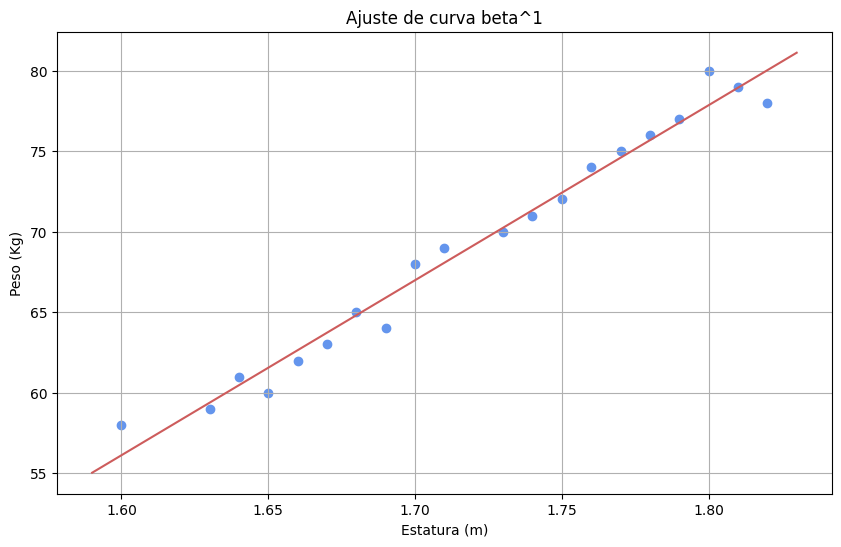


Beta^2: 
[ 13.40543333 -44.37399354  44.5833471 ]


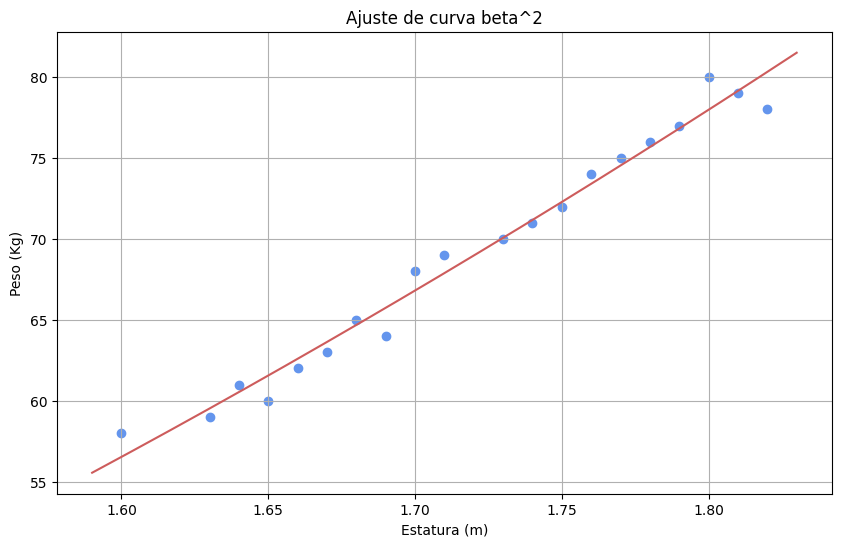


Beta^3: 
[ 12514.19636536 -21993.58255005  12879.87495422  -2499.75889969]


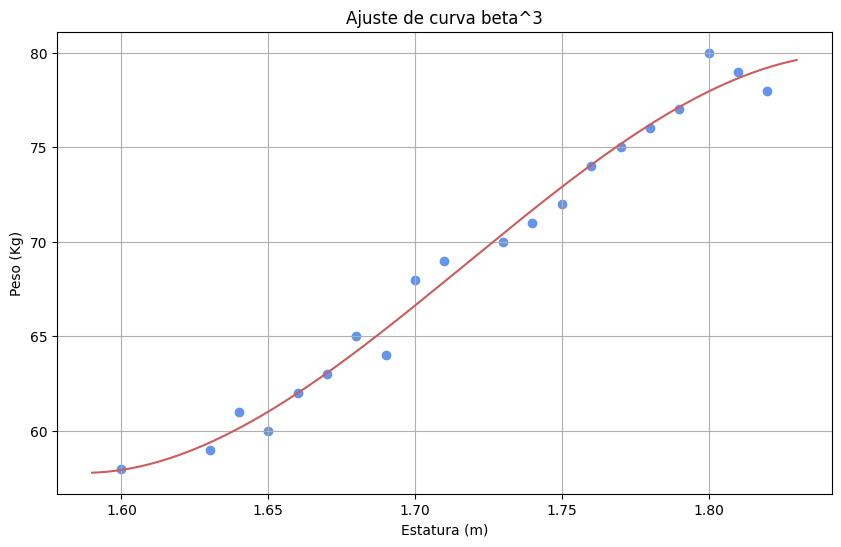


Beta^4: 
[-35170.36256063  89760.4003289  -85270.13853305  35786.90503724
  -5596.92670968]


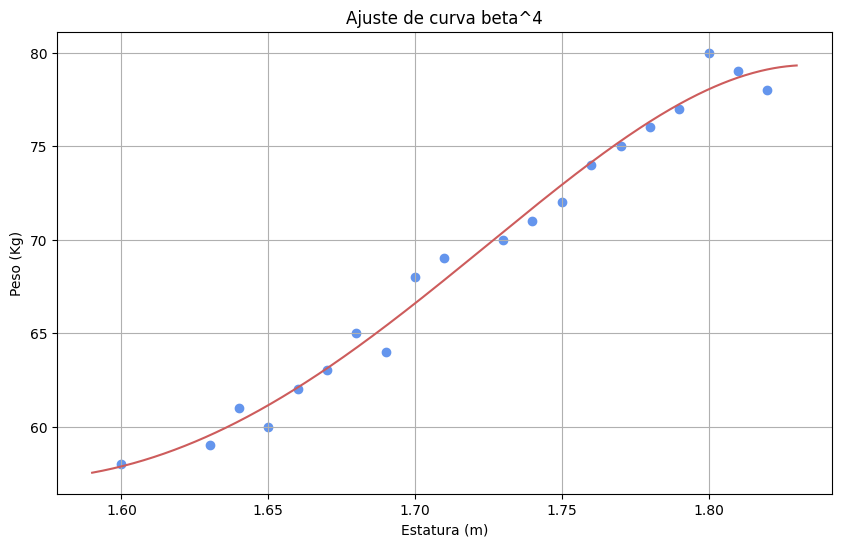


Beta^5: 
[ 2737712. -8042080.  9450144. -5552128.  1630920.  -191616.]


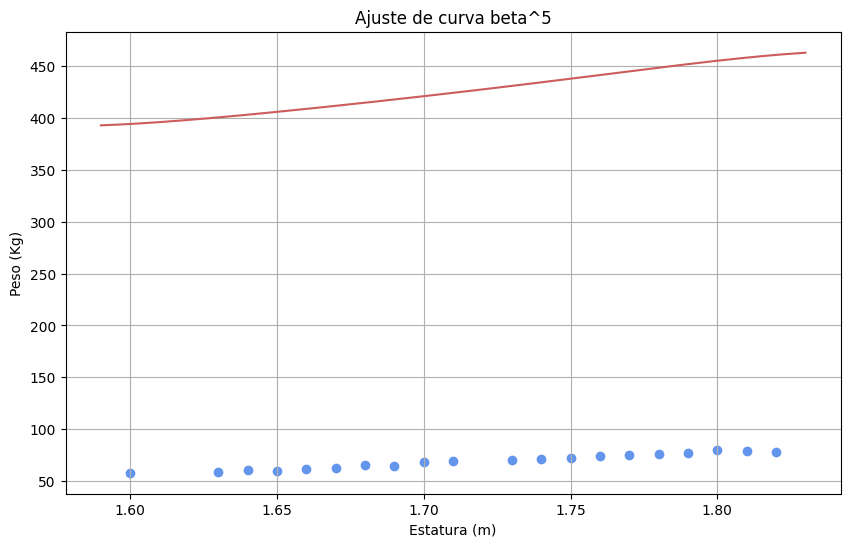

In [18]:
for i in range(5):
    max_power = i+1 # Cambia este valor a cualquier potencia máxima

    reg_n(max_power)

##Regresión Múltiple con Regularización RIDGE

In [19]:
def RIDGE_lambda_reg_n(max_power, lambda_value):
    df = pd.DataFrame({'Beta 0': 1, 'Estatura': valores})

    for power in range(2, max_power + 1):
        new_column_name = f"{'Estatura'}^{power}"
        df[new_column_name] = df['Estatura'] ** power

    xtx=np.dot(df.T, df)
    lambda_I=lambda_value*np.identity(len(xtx))
    XTX_li=xtx+lambda_I
    xty=np.dot(df.T, y)
    XTX_li_inv=np.linalg.inv(XTX_li)
    betas=np.dot(XTX_li_inv, xty)
    y_b = np.polyval(betas[::-1], x)

    print("Beta^" + str(max_power) + " con regularización RIDGE y lambda = " + str(lambda_value) + ": \n" + str(betas))

    plt.figure(figsize=(10, 6))
    plt.scatter(valores, y, c="cornflowerblue")
    plt.plot(x, y_b, c="indianred")
    plt.title("Ajuste de curva beta^" + str(max_power) + " con regularización RIDGE y lambda = " + str(lambda_value))
    plt.xlabel("Estatura (m)")
    plt.ylabel("Peso (Kg)")
    plt.grid()
    plt.show()

    print()


Beta^1 con regularización RIDGE y lambda = 10: 
[15.24280282 26.86782767]


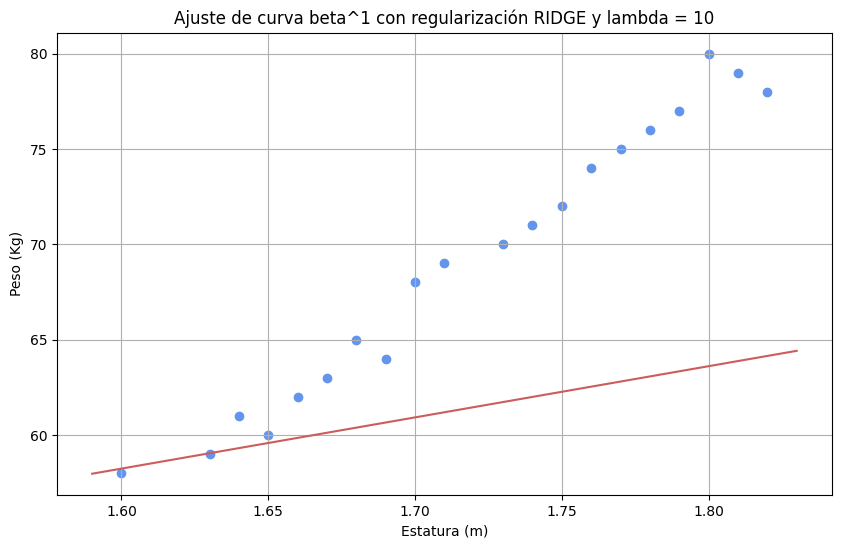


Beta^2 con regularización RIDGE y lambda = 10: 
[ 4.89166745  8.78139638 15.75424327]


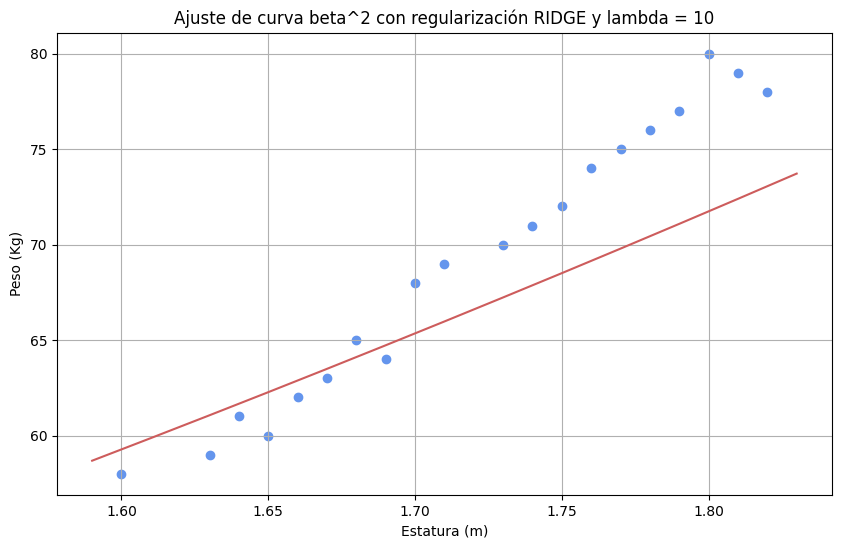


Beta^3 con regularización RIDGE y lambda = 10: 
[1.66794486 2.93091065 5.1539687  9.0694556 ]


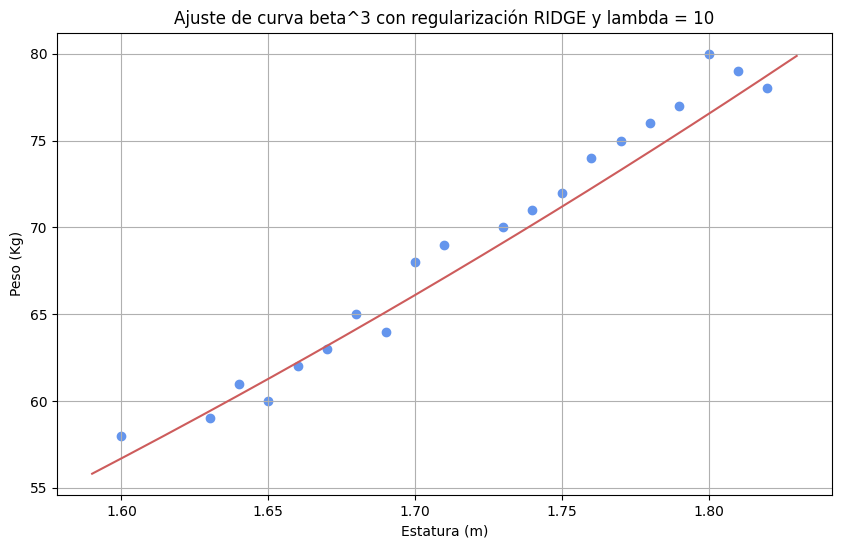


Beta^4 con regularización RIDGE y lambda = 10: 
[1.00493761 1.52377544 2.27290125 3.31611715 4.6892995 ]


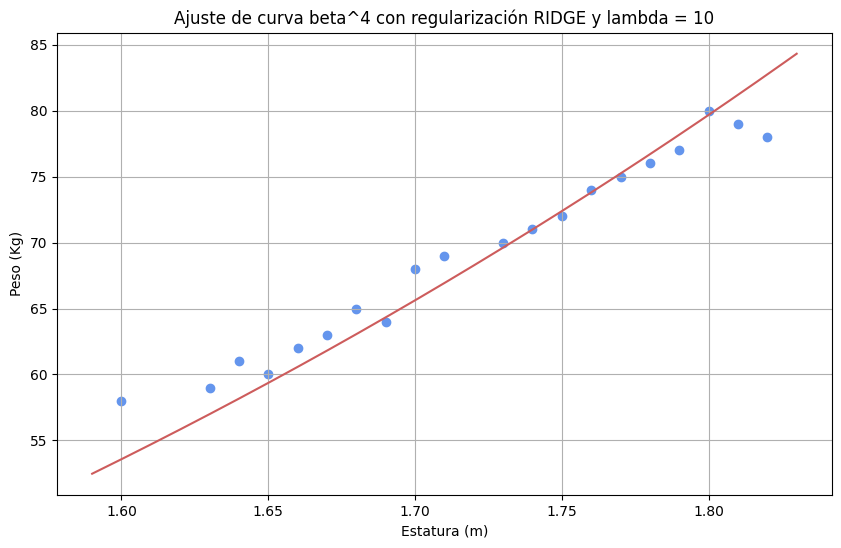


Beta^5 con regularización RIDGE y lambda = 10: 
[1.07249123 1.50763264 2.01785018 2.48608993 2.58617902 1.53981793]


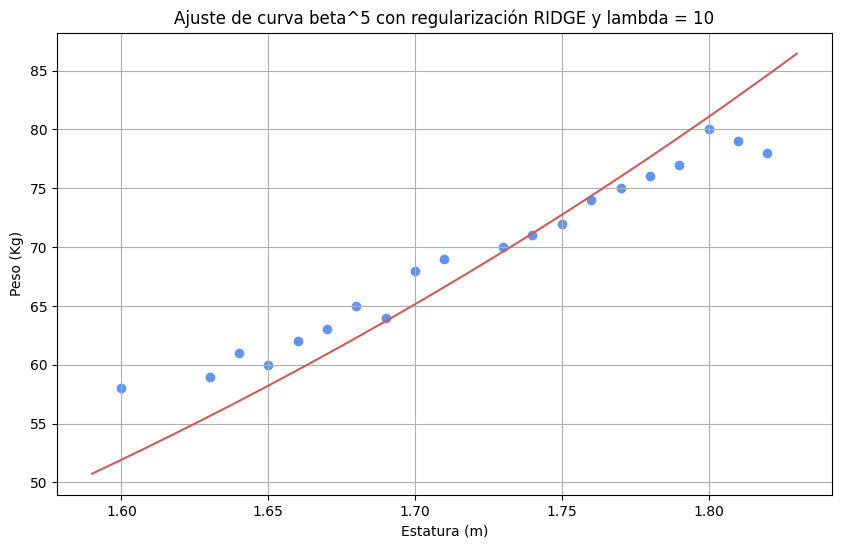

In [20]:
for i in range(5):
    max_power = i+1 # Cambia este valor a cualquier potencia máxima
    lambda_value = 10

    RIDGE_lambda_reg_n(max_power, lambda_value)

# Problem 5
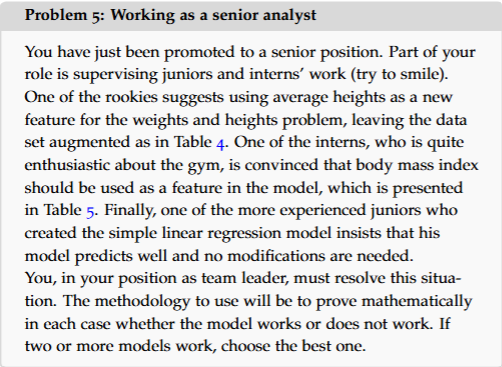

- El escenario con la columna del promedio de la estatura no es posible, ya que como ya se tiene una columna de 1s, al agregar una columna de valores iguales se crea un dependencia lineal entre 2 columnas (una es múltiplo de otra) significando en que los valores únicos de la matriz sean 0, volviendo imposible invertir la matriz, y por ende calcular los valores de $\beta$.

- El escenario que utiliza IMC es posible matematicamente, ya que no se crea una dependencia lineal entre las columnas. El modelo es posible y arrojará un resultado, pero no se recomienda utilizarlo, ya que el IMC utiliza el peso para su cálculo. Recordemos que el peso el la variable "y" que estamos intentando predecir, por lo que al agregar una columna que dependa de la respuesta esperada, se pierde información en el modelo, ya que para predecir el peso de las personas se utiliza el mismo peso de las personas.

- Por el lado contrario la regresión que creo el empleado más experimentado es posible matematicamente y adecuado lógicamente para la predicción, por lo que se considera que este es el más adecuado. Aunque asume que existe una relación lineal entre estatura y peso, este es el modelo que, con diferencia, es el mejor para utilizar.